In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set()
sns.set_style('white')

### Data Loading 

In [2]:
data_path = '../data/data_by_group/'
data_list = ['1','2','3','4','5']
start_date = '2005-01-01'
end_date = '2020-03-26'

In [3]:
def load_data(file_path,rating_class,start_date,end_date):
    path = file_path+str(rating_class)+'/'
    files = os.listdir(path)
    output_path='../data/rating_class_%s.csv'%str(rating_class)
    for i in range(len(files)):
        data_path = path+files[i]
        temp_df = pd.read_csv(data_path)
        date=temp_df[temp_df.columns[0]][1:]
        temp_df['Date'] = pd.to_datetime(date,format='%Y%m%d')
        temp_df.set_index('Date',inplace=True)
        temp_df = temp_df[start_date:end_date]
        if i==0:
            result_df=temp_df
        else:
            result_df=pd.concat([result_df, temp_df], axis=1)
        result_df.to_csv(output_path, index=True)
    
    return result_df

In [4]:
rating_1_df = load_data(data_path,1,start_date,end_date)
rating_2_df = load_data(data_path,2,start_date,end_date)
rating_3_df = load_data(data_path,3,start_date,end_date)
rating_4_df = load_data(data_path,4,start_date,end_date)
rating_5_df = load_data(data_path,5,start_date,end_date)

In [42]:
rating_5_df.isnull().sum()

Askari Bank Ltd                                              0
Beh-Property Co Ltd                                       2263
Beijing Homyear Capital Holdings Co Ltd                    413
Beijing Zodi Investment Co Ltd                              92
CBL & Associates Properties Inc                              0
DongfengSci-Tech Group Co Ltd                              870
Ecobank Transnational Inc                                 1002
Ecsponent Ltd                                             1003
FlexiGroup Ltd/Australia                                  1001
Harbin Gong Da High-Tech Enterprise Development Co Ltd    1415
Intu Properties PLC                                          1
Jahangir Siddiqui & Co Ltd                                   0
Jilin Cheng Cheng Group Co Ltd                             126
Metro Land Corp Ltd                                          0
Resimac Group Ltd                                          101
Soneri Bank Ltd                                        

In [29]:
rating_2_df.count()

1st Constitution Bancorp             5564
A Brown Co Inc                       5123
Berkshire Bancorp Inc/NY             3257
BNC Bancorp                          4552
Commonwealth Bank of Australia       5564
CRED Holding Co Ltd                  4856
First Commonwealth Financial Corp    5564
Fonciere Atland                      4948
FRACTALE Corp                        5354
Fragrance Group Ltd                  5321
Glen Burnie Bancorp                  5564
Hang Seng Bank Ltd                   5564
Hitachi Capital Corp                 5564
HSBC Holdings PLC                    5563
Joindre Capital Services Ltd         4470
Jordan French Insurance              5139
Panther Securities PLC               5555
Prudential Bancorp Inc               5383
Public Bank Bhd                      5564
Southside Bancshares Inc             5564
dtype: int64

### Data Characteristic 

In [7]:
#Plot Average level of Default Probabilits in the data sef
comb_data = pd.concat([rating_1_df,rating_2_df,rating_3_df,rating_4_df,rating_5_df],axis=1)
average_all_level = comb_data.mean(axis=1)

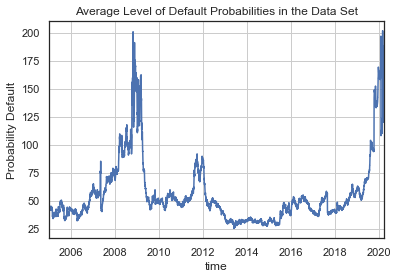

In [8]:
average_all_level.plot()
plt.title('Average Level of Default Probabilities in the Data Set')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.show()

In [9]:
#plot Avarage Level of Defaut Probabilities in Each Rating Class
final_data = None
for i in range(1,6):
    col_name = 'Rating '+str(i)
    data_df = pd.DataFrame(data=(comb_data.iloc[:,(i-1)*20:20*i ]).mean(axis=1),columns=[col_name])
#     data_df.rename(columns={data_df.columns[0]:col_name})
#     data_df = data_df.mean(axis=1)
    final_data = pd.concat([final_data,data_df],axis=1)
    


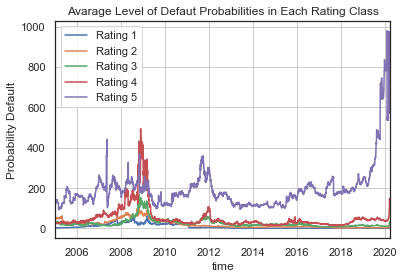

In [10]:
final_data.plot()
plt.title('Avarage Level of Defaut Probabilities in Each Rating Class')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.legend()
plt.show()

In [11]:
final_data.apply(min).T

Rating 1     0.278512
Rating 2     2.089974
Rating 3     7.563963
Rating 4    13.711202
Rating 5    93.379713
dtype: float64

In [12]:
def describe_data(data_df):
    col_name = ['Min','Max','Mean','Std','Skew','Kurtosis']
    lomo_df = pd.DataFrame(data_df.count().T,columns=['Count'])
    for function in col_name:
        lomo_df[function] = data_df.apply(str.lower(function))
    return lomo_df

In [13]:

level_df = describe_data(final_data)
level_df

,Count,Min,Max,Mean,Std,Skew,Kurtosis
Rating 1,5564,0.278512,60.497325,8.939464,11.561562,1.413221,1.127285
Rating 2,5564,2.089974,98.618810,20.046230,19.904008,1.481384,1.527389
Rating 3,5564,7.563963,168.764179,25.337388,20.648640,3.254135,12.589380
Rating 4,5564,13.711202,494.697090,50.925267,55.664673,3.870429,17.656244
Rating 5,5564,93.379713,980.275962,194.560495,107.969828,3.565329,15.449609


In [14]:
change_df = (final_data - final_data.diff()).dropna(axis=0)
change_df_summary = describe_data(change_df)
change_df_summary

,Count,Min,Max,Mean,Std,Skew,Kurtosis
Rating 1,5563,0.278512,60.497325,8.940934,11.562081,1.412967,1.126522
Rating 2,5563,2.089974,98.618810,20.048707,19.904939,1.481129,1.526576
Rating 3,5563,7.563963,168.764179,25.337555,20.650493,3.253820,12.586486
Rating 4,5563,13.711202,494.697090,50.916841,55.666128,3.871168,17.660056
Rating 5,5563,93.379713,980.275962,194.452353,107.677756,3.566715,15.492943


### kendall's tau

In [15]:
#for PD levels
final_data.corr(method='kendall')

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Rating 1,1.000000,0.636353,0.517203,0.551604,0.087770
Rating 2,0.636353,1.000000,0.585186,0.371215,-0.039457
Rating 3,0.517203,0.585186,1.000000,0.357620,-0.025086
Rating 4,0.551604,0.371215,0.357620,1.000000,0.301711
Rating 5,0.087770,-0.039457,-0.025086,0.301711,1.000000


In [16]:
#for PD changes
change_df.corr(method='kendall')

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Rating 1,1.000000,0.636400,0.517384,0.551949,0.088021
Rating 2,0.636400,1.000000,0.585329,0.371432,-0.039314
Rating 3,0.517384,0.585329,1.000000,0.357554,-0.025229
Rating 4,0.551949,0.371432,0.357554,1.000000,0.301534
Rating 5,0.088021,-0.039314,-0.025229,0.301534,1.000000


### Asymmetric correlation for every pair of rating classed in the data 

In [50]:
data_df = final_data

In [18]:
data_df

Date,2005-01-01,2005-01-02,2005-01-03,2005-01-04,2005-01-05,2005-01-06,2005-01-07,2005-01-08,2005-01-09,2005-01-10,...,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26
1st Source Corp,6.452600,6.452600,6.619952,7.726963,8.101278,8.217198,8.965246,8.965246,8.965246,9.083574,...,1.886691,2.896252,2.104507,2.867960,2.867960,2.867960,3.028466,2.214164,2.195592,1.695666
3i Group PLC,0.417814,0.417814,0.417814,0.391659,0.405360,0.415208,0.409519,0.409519,0.409519,0.398555,...,0.282433,0.348006,0.331414,0.252705,0.252705,0.252705,0.323691,0.196583,0.170895,0.135801
BlackRock Inc,14.809923,14.809923,15.275436,15.194908,15.254030,13.395644,13.881034,13.881034,13.881034,13.313593,...,0.471756,0.514392,0.394987,0.629010,0.629010,0.629010,0.866266,0.536831,0.382444,0.229557
Bridge Capital Holdings,10.944022,10.944022,10.636545,11.815782,11.672923,12.517979,11.904728,11.904728,11.904728,14.871670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bridgemarq Real Estate Services,0.000356,0.000356,0.000356,0.000314,0.000307,0.000308,0.000309,0.000309,0.000309,0.000349,...,0.119459,0.379052,0.248734,0.309384,0.309384,0.309384,0.619219,0.699682,0.373823,0.104859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Metro Land Corp Ltd,416.381622,416.381622,416.381622,416.841345,398.537262,396.228144,398.113148,398.113148,398.113148,387.941596,...,596.658880,643.304437,700.260198,743.633311,743.633311,743.633311,782.667990,785.962922,754.593223,778.782913
Resimac Group Ltd,14.800195,14.800195,14.800195,14.397235,12.981730,12.991425,12.547215,12.547215,12.547215,12.892604,...,484.629036,593.550612,916.554987,763.862337,763.862337,763.862337,992.675101,909.159534,814.574937,646.177839
Soneri Bank Ltd,12.373680,12.373680,12.091126,11.550040,11.502453,10.243035,10.411152,10.411152,10.411152,9.385066,...,529.459859,691.790499,638.500298,679.277612,679.277612,679.277612,679.277612,683.882357,736.695051,733.326478
Tianjin Songjiang Co Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,611.699289,624.595460,598.007741,611.462542,611.462542,611.462542,610.953314,575.069712,583.151379,618.457618


In [51]:
data_df = (data_df - data_df.mean())/data_df.std()

In [52]:
data_df.head()

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Date,,,,,
2005-01-01,-0.467644,1.653326,0.106745,-0.420497,-0.541224
2005-01-02,-0.467644,1.653326,0.221923,-0.374378,-0.541224
2005-01-03,-0.464294,1.659212,0.142862,-0.424663,-0.541697
2005-01-04,-0.455017,1.628709,0.188219,-0.420882,-0.539842
2005-01-05,-0.453136,1.499836,0.212895,-0.398759,-0.579499


In [21]:
data_df = (final_data - final_data.mean()) / final_data.std()

In [43]:
data_df = data_df.T
data_df.head()

Date,2005-01-01,2005-01-02,2005-01-03,2005-01-04,2005-01-05,2005-01-06,2005-01-07,2005-01-08,2005-01-09,2005-01-10,...,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26
Rating 1,-0.467644,-0.467644,-0.464294,-0.455017,-0.453136,-0.456935,-0.452705,-0.452705,-0.452705,-0.442830,...,-0.690569,-0.675957,-0.686793,-0.682106,-0.682106,-0.682106,-0.654390,-0.678209,-0.690348,-0.707350
Rating 2,1.653326,1.653326,1.659212,1.628709,1.499836,1.532365,1.491700,1.491700,1.491700,1.427421,...,-0.703260,-0.674427,-0.655824,-0.666786,-0.666786,-0.666786,-0.644208,-0.680473,-0.696956,-0.692374
Rating 3,0.106745,0.221923,0.142862,0.188219,0.212895,0.202346,0.172695,0.243549,0.300697,0.223901,...,0.073091,0.273475,0.320834,0.231961,0.231961,0.231961,0.419282,0.159194,-0.010445,-0.044969
Rating 4,-0.420497,-0.374378,-0.424663,-0.420882,-0.398759,-0.411098,-0.432244,-0.387500,-0.387500,-0.427976,...,1.124494,1.744921,1.229696,1.108418,1.108418,1.108418,1.287498,1.204379,0.974220,0.842061
Rating 5,-0.541224,-0.541224,-0.541697,-0.539842,-0.579499,-0.590855,-0.592059,-0.592059,-0.592059,-0.609763,...,4.641948,5.299277,5.368385,5.224073,5.224073,5.224073,5.964408,6.055106,5.783194,5.571854


In [67]:
i = 0.1
x1 = data_df['Rating 1']
x2 = data_df['Rating 2']
result_list = []
for i in range(1,9,1):
    i = i/10
    q1 = x1[x1>x1.quantile(i)]
    q2 = x2[x2>x2.quantile(i)]
    length = min(len(q1),len(q2))
    q1 = q1[:length]
    q2 = q2[:length]
    result_list.append(np.corrcoef(q1, q2)[0][1])
    

In [72]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [252]:
def asymmetric_corr(data_df):
    rating_class = data_df.columns
    count = 0

    plt.figure(figsize=(20,20))
    for i in range(len(rating_class)):

        for m in range(i+1,len(rating_class)):
            result_list = []
            rating_1 = data_df[rating_class[i]]
            rating_2 = data_df[rating_class[m]]
            title = rating_class[i] + ' & ' + rating_class[m]
            for q in np.arange(0.1,1,0.1):
                sub_rating_1 = rating_1[rating_1>rating_1.quantile(q)]
                sub_rating_2 = rating_2[rating_2>rating_2.quantile(q)]
                length = min(len(sub_rating_1),len(sub_rating_2))
                sub_rating_1 = sub_rating_1[:length]
                sub_rating_2 = sub_rating_2[:length]
                result_list.append(np.corrcoef(sub_rating_1,sub_rating_2)[0][1])
            count +=1
            loc= int(str(33)+str(count))
            if count==10:
                pass
            else:
                plt.subplot(loc)
            plt.plot(np.arange(0.1,1,0.1),result_list)
            plt.title(title)
            plt.xlabel('Exceedance Level')
            plt.ylabel('Conditional Probability')
            

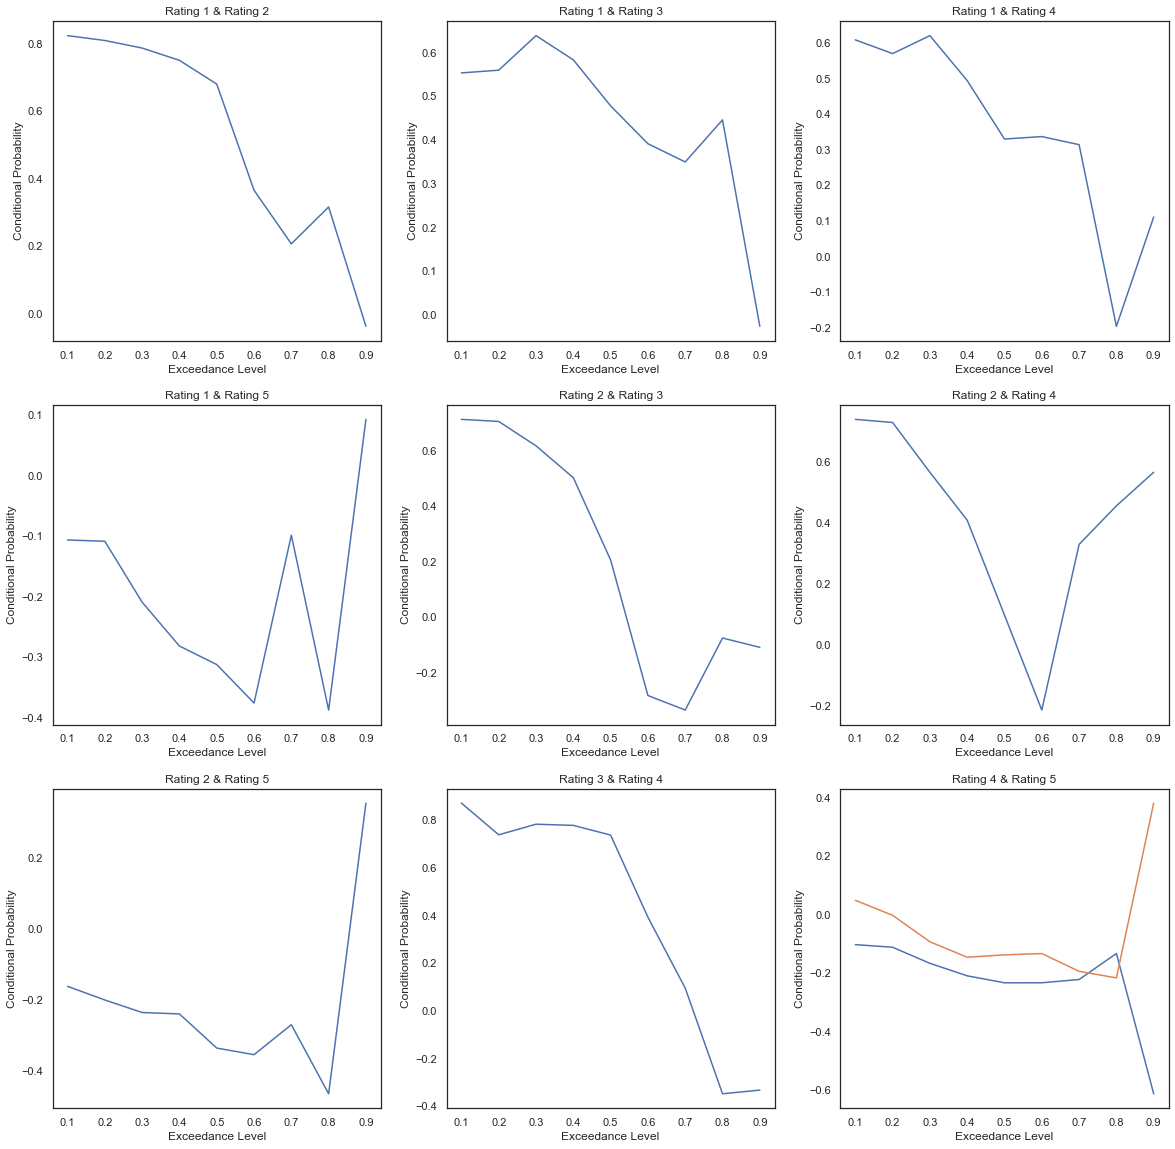

In [253]:
asymmetric_corr(data_df)

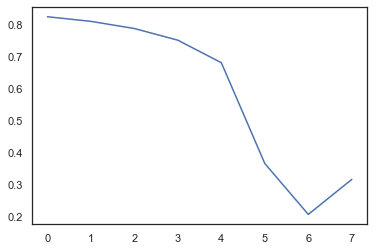

In [120]:
plt.plot(result_list)